**<font color=black size=5 face=雅黑>项目：电信公司客户流失分析项目</font>**

### * 项目背景：

该项目是基于Kaggle"Telco Customer Churn"的项目。
用户可以自由的选择不同的电信服务公司，电信服务行业的竞争十分激烈，因此客户流失率是每个公司都非常关注的指标。如果一家公司可以准确的预测哪些客户高风险的流失客户，那么公司就可以对高风险的客户进行精细化运营，从而减少留住现有客户的成本。

### * 分析目标：

在本项目中，我将尝试探索以下问题：

1. 流失用户与非流失客户的占比情况？
2. 流失客户的人口统计信息是否有明显特征？
3. 流失客户的账户信息是否有明显特征？
4. 根据电信公司所提供的服务，客户流失是否有任何偏好？
5. 如何计算不同客户类型的LTV值？
6. 基于本数据集，是否可以预测客户流失？
7. 基于上述特征，可否提出在业务上有助于减少客户流失率的建议？


### * 数据分析流程：

1. 探索原始数据集，找到数据集是否有缺失值和异常值并对其进行处理。
2. 将数据分为三个维度：客户人口统计信息属性、账单属性、订阅服务属性。对这三个属性的特征，探索与因变量“流失与非流失”之间的关系。
3. 计算各类型客户的LTV值。
4. 建立客户流失预测模型。

### * 数据集介绍：

本数据集共有7043条数据，21个特征，各个字段的解释和数据类型如下：


|字段名称 | 字段解释| 数据类型
|---|:---:|:---:|
|customerID |客户的ID|         文本|
|gender |客户的性别(male为男性,Female为女性)|            文本|
|SeniorCitizen | 是否为年老客户(0为非年老客户，1为年老客户) |      数值|
|Partner |是否已婚(Yes,No)|           文本|
|Dependents | 是否有家属(Yes,No)|        文本|
|tenure | 入网时长|            数值|
|PhoneService |是否开通电话服务(Yes,No)|       文本|
|MultipleLines |是否开通多线服务(Yes,No,No Phone Service)|     文本|
|InternetService |是否开通网络服务(Fiber optic,No,DSL)|    文本|
|OnlineSecurity |是否开通在线网络安全服务(Yes,No,No Internet Service)|     文本|
|OnlineBackup |是否开通在线备份服务(Yes,No,No Internet Service)|        文本|
|DeviceProtection |是否开通设备保护服务(Yes,No,No Internet Service)|    文本|
|TechSupport |是否开通技术支持服务(Yes,No,No Internet Service)|         文本|
|StreamingTV |是否开通网络电视服务(Yes,No,No Internet Service)|         文本|
|StreamingMovies |是否开通网络电影服务(Yes,No,No Internet Service)|     文本|
|Contract |合同签订时长类型(Month-to-month,One year,Two year)|            文本|
|PaperlessBilling |是否为无纸化账单(Yes,No) |  文本|
|PaymentMethod |支付方式(Electronic check, Mailed check, Bank transfer,Credit card)|      文本|
|MonthlyCharges |月付费|     数值|
|TotalCharges |年付费|       文本|
|Churn |是否为流失客户(Yes,No) |            文本|


# 1.1  加载数据

In [1]:
#载入相关包
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from logisticFunc import dataPlot
from numpy import random
from sklearn import preprocessing
import seaborn as sns

In [2]:
#载入数据
data=pd.read_csv('Telco-Customer-Churn.csv',encoding='utf-8')
telco_data=data.copy()
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.shape

(7043, 21)

# 1.2 数据预处理

In [4]:
#查看数据，发现并没有异常值。
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#需要将TotalCharges的数据类型转为数值型。
telco_data.info()
telco_data['TotalCharges'] = telco_data['TotalCharges'].apply(pd.to_numeric,errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#对缺失值进行查看
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#查看11个空缺的TotalCharges值，发现这些客户是tenure为0的新入网用户，所以这部分客户的TotalCharges值可用对应的MonthlyCharges进行补充。
telco_data[telco_data['TotalCharges'].isnull()]
telco_data.loc[:,'TotalCharges'].replace(to_replace = np.nan,value = telco_data.loc[:,'MonthlyCharges'],inplace = True)
telco_data[telco_data['tenure']==0]
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#将“Churn”这一列的Yes和No分别转换为1和0，方便后续的数据分析。
telco_data['Churn'].replace(to_replace = 'Yes',value = 1, inplace = True)
telco_data['Churn'].replace(to_replace = 'No',value = 0, inplace = True)

数据预处理完毕，下一步进行数据分析。

# 2.1 客户人口统计信息属性分析

In [9]:
print(telco_data['Churn'].value_counts())
print(telco_data['Churn'].value_counts()/len(telco_data['Churn']))

0    5174
1    1869
Name: Churn, dtype: int64
0    0.73463
1    0.26537
Name: Churn, dtype: float64


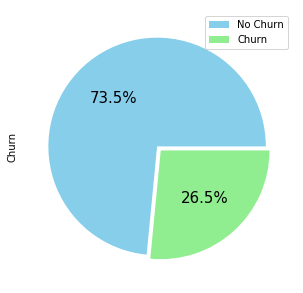

In [10]:
plt.figure(figsize = (10,5))
telco_data['Churn'].value_counts().plot(kind = 'pie',labels = ['',''],autopct='%1.1f%%',colors = ['skyblue','lightgreen'],explode=[0,0.05],textprops = {"fontsize":15})
plt.legend(labels=['No Churn','Churn'])
plt.show()


**<font color = black size=3 face=雅黑>* 项目目标一结论如下</font>**：
    
    流失客户占总体数据的26.5%，非流失客户占73.5%。

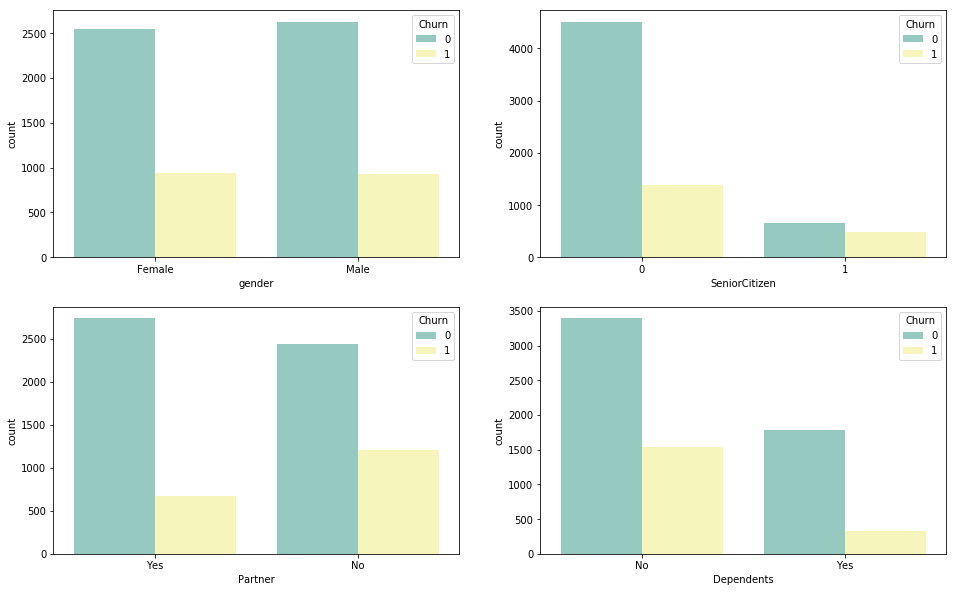

In [11]:
#探索客户人口统计信息属性与流失之间的关系。
fig1,axes1 = plt.subplots(figsize = (16,10))
plt.subplot(221)
sns.countplot(x="gender", hue="Churn",data=telco_data,palette="Set3")
plt.subplot(222)
sns.countplot(x="SeniorCitizen", hue="Churn",data=telco_data,palette="Set3")
plt.subplot(223)
sns.countplot(x="Partner", hue="Churn",data=telco_data,palette="Set3")
plt.subplot(224)
sns.countplot(x="Dependents", hue="Churn",data=telco_data,palette="Set3")
plt.show()

### * 从上图可得到项目目标二的结论：
                        
                        1.客户流失情况与性别没有关系。

                        2.虽然年老客户在总体用户的占比不大，但是年老客户的流失率较大。
                        
                        3.未婚客户的流失率高于已婚客户。
                        
                        4.无家属客户的流失率高于有家属的客户。

# 2.2 账户信息分析

In [12]:
#因为合同属性中“合同签订方式”，“是否为纸质账单”，“支付方式”这三者为离散变量，故可以使用TGI分析客户流失。
#而“月消费”与“总消费”，“入网时长”为连续变量，不适合用TGI，在此使用密度分析法进行分析。

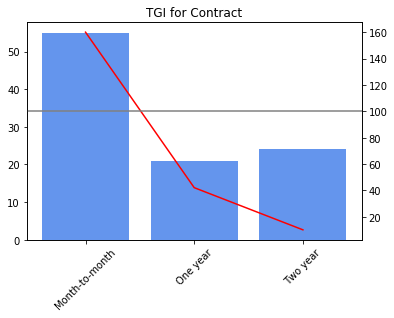

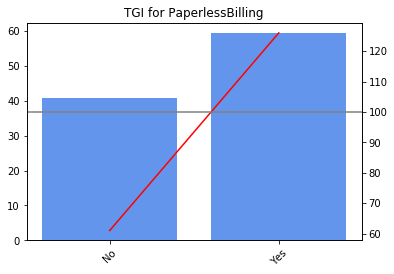

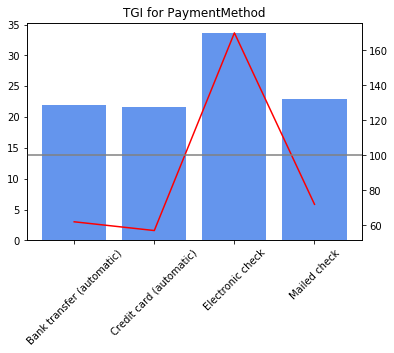

In [13]:
cols = ['Contract','PaperlessBilling','PaymentMethod']
for i in cols:
    resultAge=dataPlot(telco_data,i,'Churn')
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    ax2 = ax1.twinx()
    ax1.bar(resultAge['name'],resultAge['x1'],color='cornflowerblue')
    ax2.plot(resultAge['name'],resultAge['TGI'],linestyle='-',c='r')
    ax2.axhline(100,linestyle='-',c='grey')
    plt.title("TGI for {}".format(i))

/Users/songbeibei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


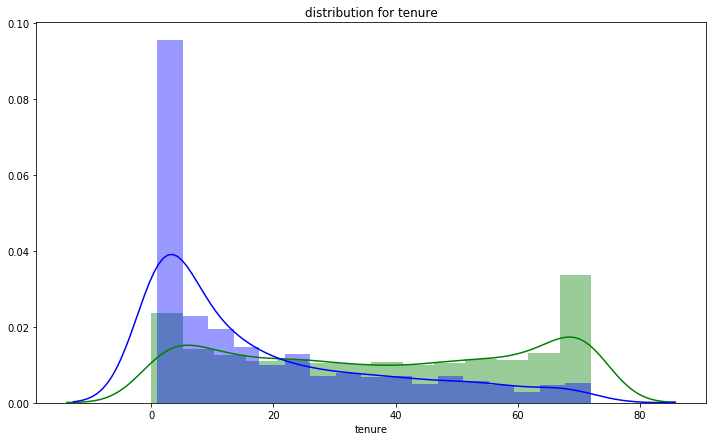

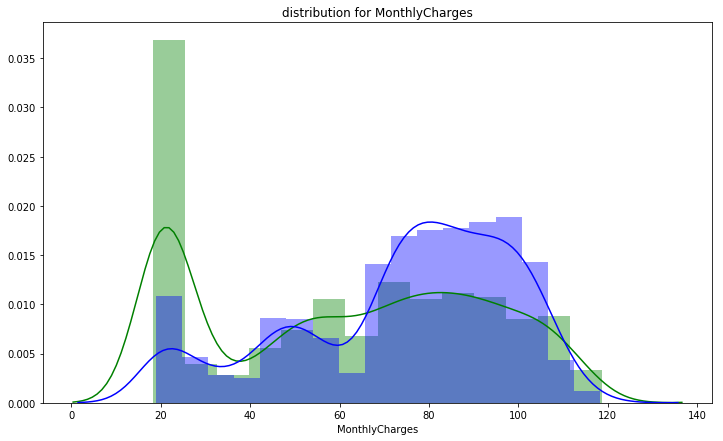

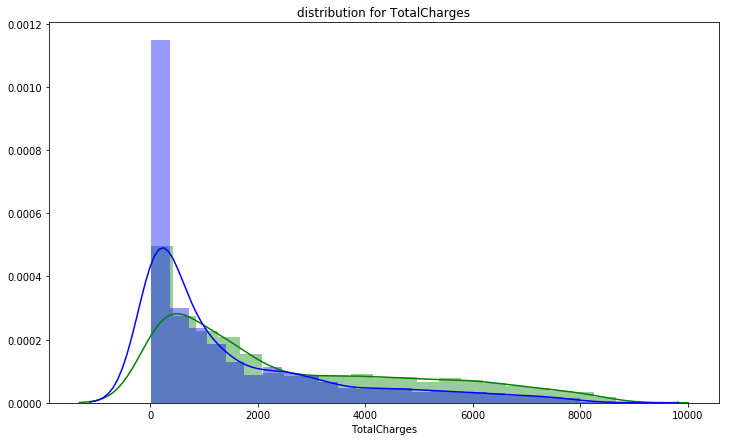

In [14]:
def displot(feature,telco_data):
    plt.figure(figsize=(12,7))
    plt.title("distribution for {}".format(feature))
    ax1 = sns.distplot(telco_data[telco_data["Churn"] ==0][feature], color = 'g', label="Churn: No")
    ax2 = sns.distplot(telco_data[telco_data["Churn"] ==1][feature], color = 'b', label="Churn: Yes")
feature = ["tenure","MonthlyCharges","TotalCharges"]

for i in feature:
    displot(i,telco_data)

### * 项目目标三结论如下：
                                    
                                    1.合同签订方式为月付的用户TGI值较高，更容易流失，这点比较容易解释，因为月付的用户，一旦合同到期，很容易就可以换到竞争对手的电信公司中去，从而导致这部分用户更容易流失。
                                    2.不使用纸质账单的用户TGI值较高，更容易流失。针对这部分客户需要进行进一步分析。
                                    3.使用电子支票方式支付的用户TGI值较高，更容易流失。针对这部分客户需要进行进一步分析。
                                    4.入网时长较短的客户更容易流失，这个也容易理解，因为新入网的新客户对产品可能不太熟悉，黏性较低，所以导致这部分客户更容易流失。
                                    5.月消费在70-110之间的客户更容易流失。针对这部分客户需要进行进一步分析。
                                    6.总消费较低的客户，更容易流失，这其实与入网时间较短的客户是一个用户群体，这部分的客户因为用户黏性低，更容易流失。

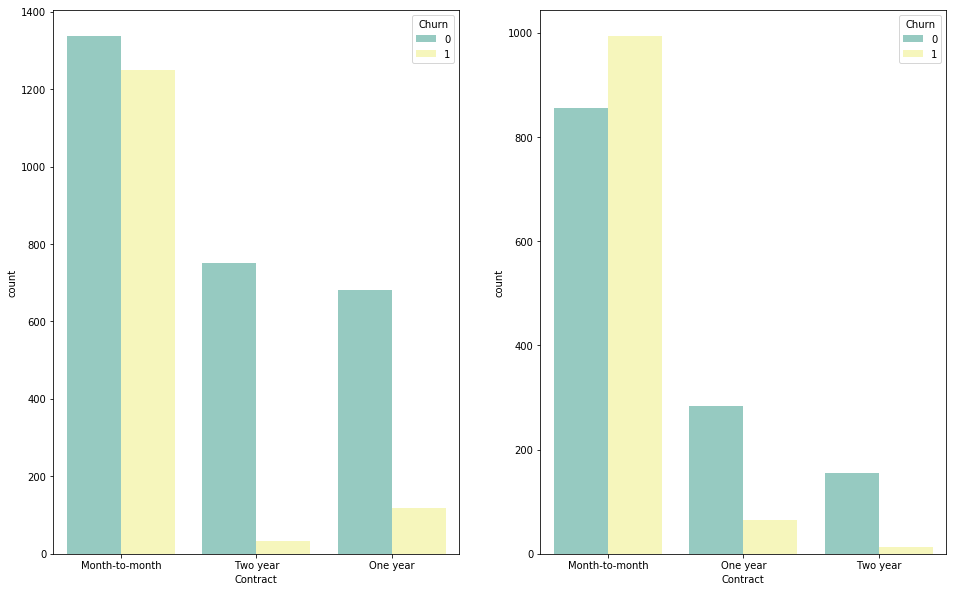

In [15]:
#分析不使用纸质账单和使用电子支票付费的客户，为什么流失率较高。
fig3,axes3 = plt.subplots(figsize = (16,10))
plt.subplot(121)
cus_p = telco_data[telco_data["PaperlessBilling"] =='Yes']
sns.countplot(x="Contract", hue="Churn",data=cus_p,palette="Set3")
plt.subplot(122)
cus_pm = telco_data[telco_data["PaymentMethod"] =='Electronic check']
sns.countplot(x="Contract", hue="Churn",data=cus_pm,palette="Set3")

从上图可以看到不使用纸质账单和电子支票支付的客户，他们都更喜欢用月付作为合同签订方式，这也就解释了为什么这两类客户更容易流失。

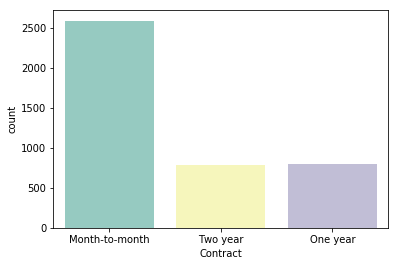

In [16]:
#分析月消费在70-110之间的客户，为什么更容易流失。
cus_m = telco_data[(telco_data["MonthlyCharges"] > 70) &(telco_data["MonthlyCharges"] < 110) ]
cus_m.describe()
sns.countplot(x="Contract",data=cus_p,palette="Set3")


已知全体客户的月均消费金额为64.761692，月消费在70-110之间的客户，比全体客户的平均消费金额高，且他们绝大多数都是月付用户，本来月付用户的忠诚度就不高，加上每月消费的金额超过平均值，则这部分用户更容易流失。

# 2.3 订阅服务属性分析

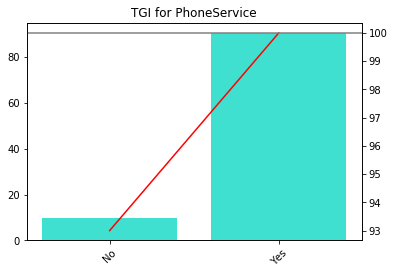

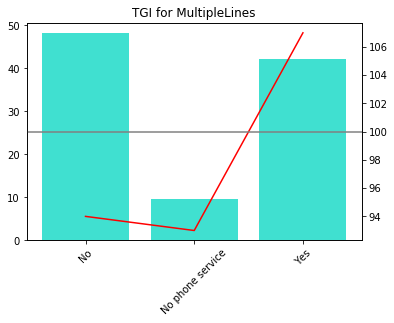

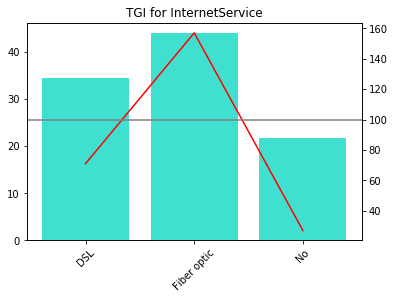

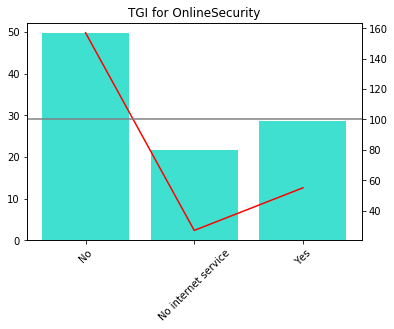

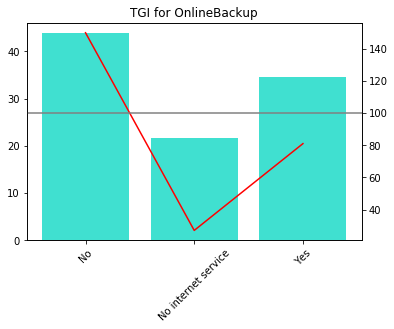

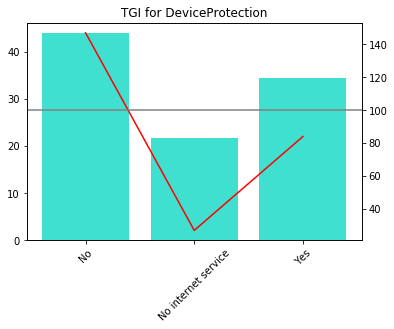

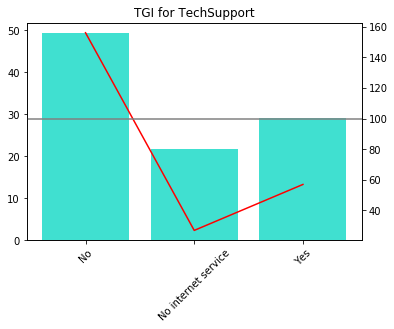

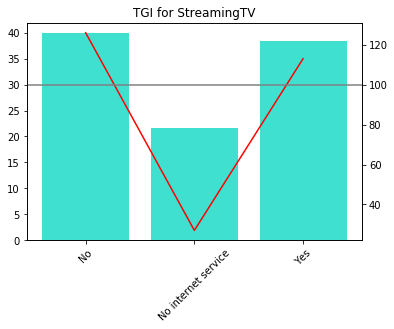

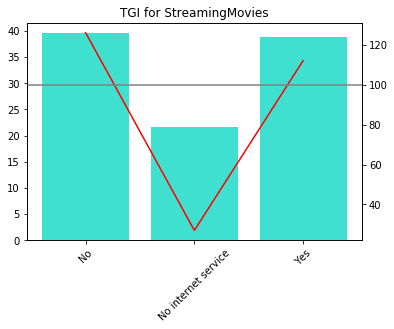

In [17]:
cols = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in cols:
    resultAge=dataPlot(telco_data,i,'Churn')
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    ax2 = ax1.twinx()
    ax1.bar(resultAge['name'],resultAge['x1'],color='turquoise')
    ax2.plot(resultAge['name'],resultAge['TGI'],linestyle='-',c='r')
    ax2.axhline(100,linestyle='-',c='grey')
    plt.title("TGI for {}".format(i))

### * 项目目标四结论如下：

               1. 使用电话服务对用户流失没有影响。
               2. 使用光纤的用户比DSL的用户更容易流失。这部分需要进一步分析。
               3. 不使用备份服务、设备保护服务、技术支持服务的用户更容易流失。使用增值服务少的用户，对产品对依赖性较低，从而较容易流失。
               4. 使用网络电视服务和网络电影服务与否，对用户流失没有很显著的影响。


In [18]:
#分析光纤与DSL客户为什么流失率差异显著。
#cus_i= telco_data.ix[:,["InternetService","MonthlyCharges"]]
#cus_i.set_index(["InternetService"],inplace=True)
#print(cus_i)
cus_if_mean = telco_data[telco_data["InternetService"] =='Fiber optic']["MonthlyCharges"].mean()
print("网络服务为光纤的客户月均付费为:  "+str(cus_if_mean))
cus_id_mean = telco_data[telco_data["InternetService"] =='DSL']["MonthlyCharges"].mean()
print("网络服务为DSL的客户月均付费为:  "+str(cus_id_mean))

网络服务为光纤的客户月均付费为:  91.50012919896615
网络服务为DSL的客户月均付费为:  58.10216852540261


光纤客户的月平均付费比DSL客户高出接近一倍，因为光纤收费较高，所以光纤客户也更容易流失。

### * 客户流失特征总结：

            1. 用户流失与性别关系不大，老年用户、未婚用户和无家属的客户更容易流失。
            2. 合同签订方式为月付费的客户、不使用纸质账单的用户和用电子支票付费的客户更容易流失。
            3. 另外，入网时长较短的客户和月消费在70-110之间的客户更容易流失。
            4. 相对于DSL，光纤定价较高，所以也容易导致使用光纤的客户流失。
            5. 没有订阅备份服务、设备保护服务、技术支持服务的客户更容易流失。

## 2.4 用户生命周期价值

In [19]:
#LTV = tenure.mean() * MonthlyCharges.mean()
#不同性别客户的LTV
cus_mm_mean = telco_data[(telco_data["gender"] =="Male") & (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_fm_mean = telco_data[(telco_data["gender"] =="Female")& (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_mt_mean = telco_data[(telco_data["gender"] =="Male")& (telco_data["Churn"] ==1)]["tenure"].mean()
cus_ft_mean = telco_data[(telco_data["gender"] =="Female")& (telco_data["Churn"] ==1)]["tenure"].mean()
print("男性客户的LTV为 {:.2f}".format(cus_mm_mean*cus_mt_mean))
print("女性客户的LTV为 {:.2f}".format(cus_fm_mean*cus_ft_mean))
#不同年龄客户的LTV
cus_om_mean = telco_data[(telco_data["SeniorCitizen"] ==1) & (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_ym_mean = telco_data[(telco_data["SeniorCitizen"] ==0) & (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_ot_mean = telco_data[(telco_data["SeniorCitizen"] ==1) & (telco_data["Churn"] ==1)]["tenure"].mean()
cus_yt_mean = telco_data[(telco_data["SeniorCitizen"] ==0) & (telco_data["Churn"] ==1)]["tenure"].mean()
print("年老客户的LTV为 {:.2f}".format(cus_om_mean*cus_ot_mean))
print("年轻客户的LTV为 {:.2f}".format(cus_ym_mean*cus_yt_mean))
#不同婚姻状况客户的LTV
cus_pym_mean = telco_data[(telco_data["Partner"] =="Yes") & (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_pnm_mean = telco_data[(telco_data["Partner"] =="No")& (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_pyt_mean = telco_data[(telco_data["Partner"] =="Yes")& (telco_data["Churn"] ==1)]["tenure"].mean()
cus_pnt_mean = telco_data[(telco_data["Partner"] =="No")& (telco_data["Churn"] ==1)]["tenure"].mean()
print("已婚客户的LTV为 {:.2f}".format(cus_pym_mean*cus_pyt_mean))
print("未婚客户的LTV为 {:.2f}".format(cus_pnm_mean*cus_pnt_mean))
#是否有家属的客户的LTV
cus_dym_mean = telco_data[(telco_data["Dependents"] =="Yes") & (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_dnm_mean = telco_data[(telco_data["Dependents"] =="No")& (telco_data["Churn"] ==1)]["MonthlyCharges"].mean()
cus_dyt_mean = telco_data[(telco_data["Dependents"] =="Yes")& (telco_data["Churn"] ==1)]["tenure"].mean()
cus_dny_mean = telco_data[(telco_data["Dependents"] =="No")& (telco_data["Churn"] ==1)]["tenure"].mean()
print("有家属客户的LTV为 {:.2f}".format(cus_dym_mean*cus_dyt_mean))
print("无家属客户的LTV为 {:.2f}".format(cus_dnm_mean*cus_dny_mean))


男性客户的LTV为 1404.56
女性客户的LTV为 1272.12
年老客户的LTV为 1697.70
年轻客户的LTV为 1224.40
已婚客户的LTV为 2122.29
未婚客户的LTV为 941.49
有家属客户的LTV为 1605.29
无家属客户的LTV为 1280.37



### * 项目目标五结论如下：


    1. 男性客户的LTV为 1404.56  *女性客户的LTV为 1272.12，男性客户LTV值大于女性，但差别不大。
    2. 年老客户的LTV为 1697.70  *年轻客户的LTV为 1224.40，年老客户LTV值大于年轻客户。
    3. 已婚客户的LTV为 2122.29  *未婚客户的LTV为 941.49，已婚客户的LTV值显著大于未婚客户。
    4. 有家属客户的LTV为 1605.29 *无家属客户的LTV为 1280.37，有家属客户LTV值大于无家属客户。

# 3.1 特征工程

In [20]:
#消除多重共线性
columns=telco_data.columns.tolist()
enc = preprocessing.LabelEncoder()
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [21]:
# 将分类变量编码
for cols in ['customerID','gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']:
    telco_data[cols] = enc.fit_transform(telco_data[cols])

corr_matrix = telco_data[columns].corr() #.corr计算变量与变量之间的相关性
corr_matrix["Churn"].abs().sort_values(ascending = False) #看所有自变量与因变量的相关性

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.198347
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
customerID          0.017447
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [22]:
columns.remove('Churn')# 首先剔除因变量“是否流失”，看自变量与自变量之间的相关性


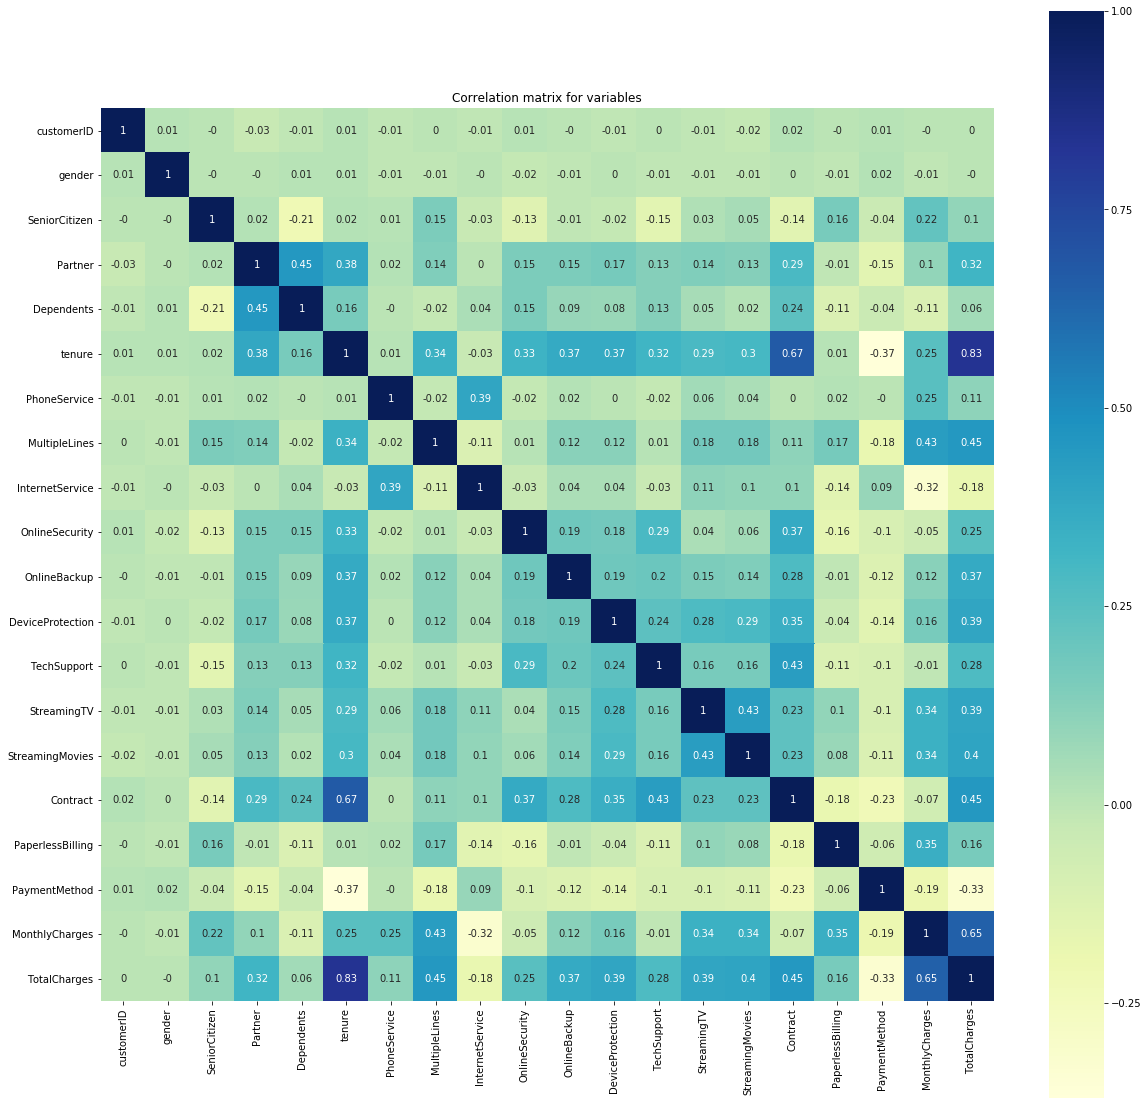

In [23]:
c=round(telco_data[columns].corr(),2)#剔除后的columns，看相关矩阵
plt.subplots(figsize=(20, 20))
sns.heatmap(c,annot=True,vmax=1, square=True,cmap="YlGnBu")
plt.title("Correlation matrix for variables")
plt.show()

从上图可以看出，入网时长(tenure)和总费用(TotalCharges)相关性最强，实际场景中，总费用确实会随着入网时长的增加而增加，也就很好的解释了这两者的强相关性。后续数据处理中，将总费用(TotalCharges)这一column从数据中去除，保留与因变量(Churn)更强的入网时长(tenure)。

从前面的分析可知，性别对客户是否流失基本没有影响，所以可以将这一特征去除。

In [24]:
columns.remove('TotalCharges')
columns.remove('gender')

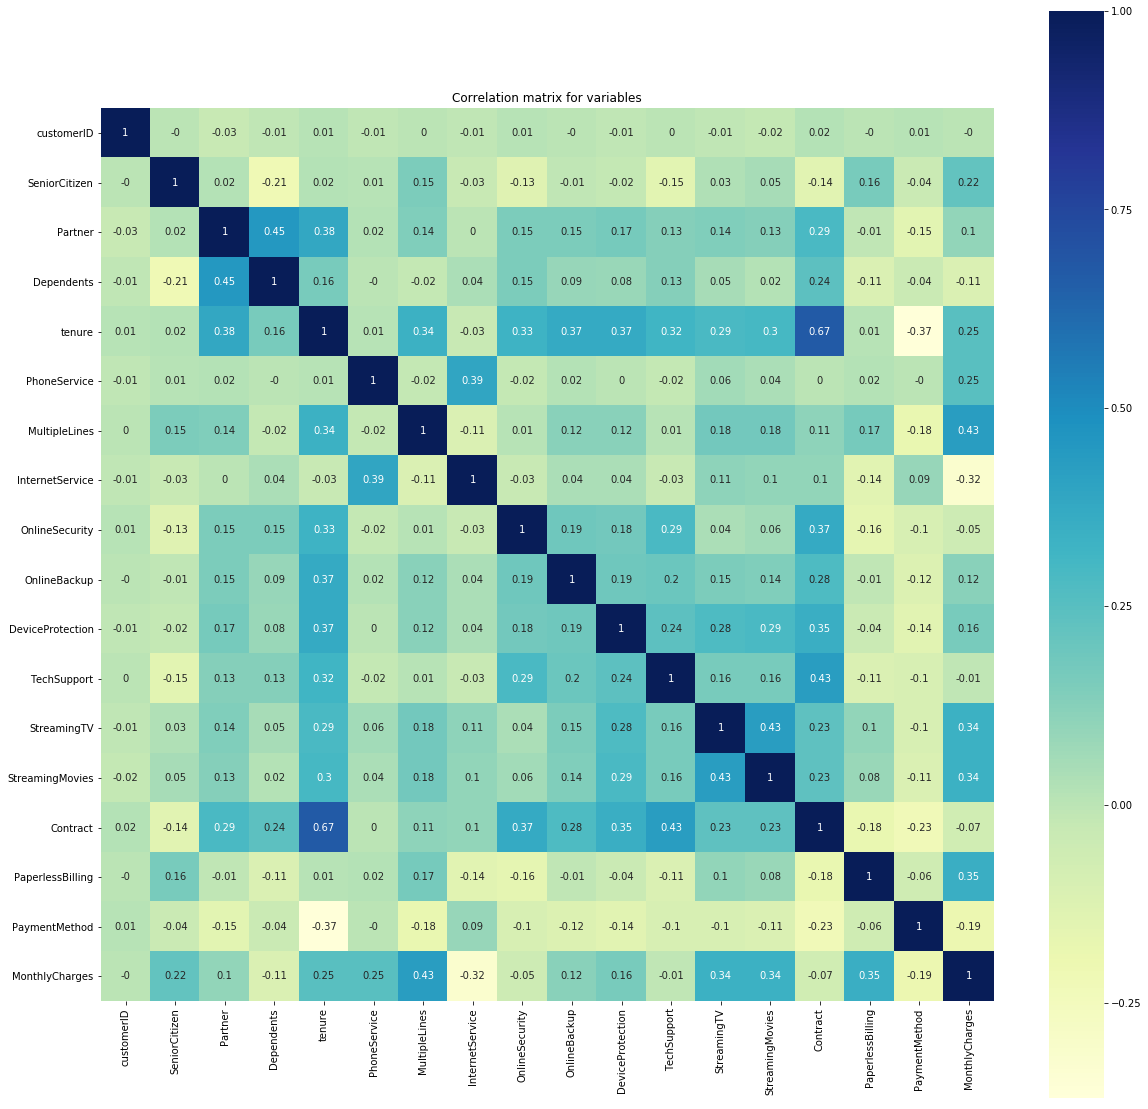

In [25]:
c=round(telco_data[columns].corr(),2)
plt.subplots(figsize=(20, 20))
sns.heatmap(c,annot=True,vmax=1, square=True,cmap="YlGnBu")
plt.title("Correlation matrix for variables")
plt.show()

# 3.2 数据处理

In [26]:
# 处理分类变量
columns.remove('customerID') #ID没有意义可以去掉
X=pd.get_dummies(telco_data[columns])
y=telco_data['Churn']
# 将数据集按照7:3或8:2分为训练集和测试集
X_train,  X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=1)

# 3.3 逻辑回归模型预测客户流失

In [27]:
print("....<1>开始训练第一个逻辑回归模型...")
LogsitcModel=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)
LogsitcModel.fit(X_train,y_train)
print(LogsitcModel.score(X_train,y_train))

....<1>开始训练第一个逻辑回归模型...
0.8022312373225152


In [28]:
#预测用户是否流失
print("....<2>使用模型开始预测...")
y_pred1=LogsitcModel.predict(X_test)
print(y_pred1)
print(pd.DataFrame(y_pred1)[0].value_counts())
print(pd.DataFrame(y_test)[0].value_counts())

....<2>使用模型开始预测...
[0 0 0 ... 1 0 0]
0    1627
1     486
Name: 0, dtype: int64
0    1585
1     528
Name: 0, dtype: int64


In [29]:
#输出模型的准确率和混淆矩阵
print(metrics.accuracy_score(y_test, y_pred1))
print(metrics.confusion_matrix(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred1))

0.812588736393753
[[1408  177]
 [ 219  309]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1585
           1       0.64      0.59      0.61       528

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.75      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



LR模型的准确率为0.812588736393753，但是它对于流失客户(Churn=1)的召回率只有0.59，显然，相比于被错误的预测出哪些客户会流失，会流失的客户没有被预测出来的代价更高，即本项目中应该更关心召回率，所以我们可以将流失客户的权重适当提高：class_weight = {0:1,1:2}

In [30]:
print("....<3>开始训练第二个逻辑回归模型...")
LogsitcModel=LogisticRegression(C=1, class_weight={0:1,1:2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)
LogsitcModel.fit(X_train,y_train)
print(LogsitcModel.score(X_train,y_train))

....<3>开始训练第二个逻辑回归模型...
0.7689655172413793


In [31]:
print("....<4>使用模型开始预测...")
y_pred2=LogsitcModel.predict(X_test)
print(y_pred2)
print(pd.DataFrame(y_pred2)[0].value_counts())
print(pd.DataFrame(y_test)[0].value_counts())

....<4>使用模型开始预测...
[0 0 0 ... 1 0 0]
0    1369
1     744
Name: 0, dtype: int64
0    1585
1     528
Name: 0, dtype: int64


In [32]:
#输出模型的准确率和混淆矩阵
print(metrics.accuracy_score(y_test, y_pred2))
print(metrics.confusion_matrix(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred2))

0.7766209181258874
[[1241  344]
 [ 128  400]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1585
           1       0.54      0.76      0.63       528

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.78      0.79      2113



Text(0.5, 1.0, 'confusion matrix for LR')

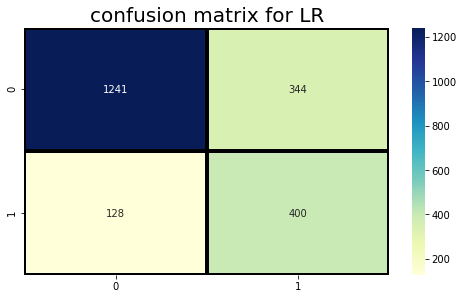

In [33]:
#混淆矩阵画图
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred2),annot = True,fmt = "d",linecolor = "k",linewidths =3,cmap="YlGnBu")
plt.title("confusion matrix for LR",fontsize=20)

这时我们看到虽然模型的准确性有所下降(从0.812588736393753到0.7766209181258874)，但是召回率确显著提高(从0.59到0.76)

In [34]:
#预测客户流失率
y_ProbPred = LogsitcModel.predict_proba(X_test)

y_pred3 = list(y_ProbPred[:,1])
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred3)
auc = metrics.auc(fpr,tpr)

# 3.4 随机森林-预测流失率

In [35]:
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
#选择合适的决策树数量和最大深度。
rfc = RandomForestClassifier()
estimators = [1,50,100,500]
depth = [1,2,3,7,15]
err_list = []

for es in estimators:
    es_list = []
    for d in depth:
        tf = RandomForestClassifier(n_estimators=es, criterion="gini", max_depth=d, max_features=None, random_state = 0)
        tf.fit(X_train,y_train)
        st = tf.score(X_test,y_test)
        err = 1-st
        es_list.append(err)
        print("%d决策树数量，%d最大深度，正确率:%.2f%%" % (es,d,st*100))
    err_list.append(es_list)

gs = RandomForestClassifier(random_state=25,class_weight={0:1,1:2})


1决策树数量，1最大深度，正确率:75.01%
1决策树数量，2最大深度，正确率:75.30%
1决策树数量，3最大深度，正确率:79.18%
1决策树数量，7最大深度，正确率:77.33%
1决策树数量，15最大深度，正确率:72.98%
50决策树数量，1最大深度，正确率:75.01%
50决策树数量，2最大深度，正确率:79.18%
50决策树数量，3最大深度，正确率:80.41%
50决策树数量，7最大深度，正确率:81.40%
50决策树数量，15最大深度，正确率:80.08%
100决策树数量，1最大深度，正确率:75.01%
100决策树数量，2最大深度，正确率:78.94%
100决策树数量，3最大深度，正确率:80.50%
100决策树数量，7最大深度，正确率:81.26%
100决策树数量，15最大深度，正确率:79.79%
500决策树数量，1最大深度，正确率:75.01%
500决策树数量，2最大深度，正确率:79.08%
500决策树数量，3最大深度，正确率:80.45%
500决策树数量，7最大深度，正确率:81.16%
500决策树数量，15最大深度，正确率:79.93%


/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


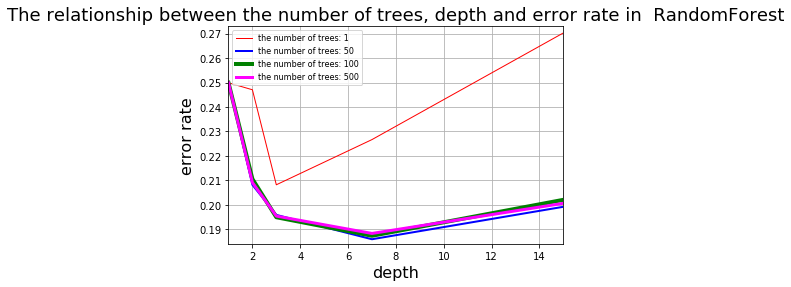

In [37]:
plt.figure(facecolor = 'w')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
i = 0
colors = ['r','b','g','magenta']
lw = [1,2,4,3]
max_err = 0
min_err = 100
for es, l in zip(estimators,err_list):
    plt.plot(depth,l,c=colors[i],lw = lw[i],label="the number of trees: {}".format(es))
    max_err = max((max(l), max_err))
    min_err = min((min(l),min_err))
    i += 1

plt.xlabel("depth",fontsize = 16)
plt.ylabel("error rate",fontsize = 16)
plt.legend(loc = "upper left", fancybox = True, framealpha = 0.8, fontsize = 8)
plt.grid(True)
plt.xlim(min(depth),max(depth))
plt.ylim(min_err * 0.99, max_err *1.01)
plt.title('The relationship between the number of trees, depth and error rate in  RandomForest',fontsize = 18)
plt.show()

根据上图和错误率，将参数调整到如下：{'max_depth': 7, 'n_estimators':50}

In [38]:
print("....<1>开始训练第一个随机森林模型...")
rfc = RandomForestClassifier(n_estimators =50,max_depth = 7, random_state = 0,min_samples_split = 2,class_weight={0:1,1:2})
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))

....<1>开始训练第一个随机森林模型...
0.8127789046653144


In [39]:
print("....<2>使用模型开始预测...")
y_prediction = rfc.predict(X_test)
print(y_prediction)
print(pd.DataFrame(y_prediction)[0].value_counts())
print(pd.DataFrame(y_test)[0].value_counts())

....<2>使用模型开始预测...
[0 0 0 ... 1 0 0]
0    1415
1     698
Name: 0, dtype: int64
0    1585
1     528
Name: 0, dtype: int64


In [40]:
#预测客户流失率
y_ProbPrediction = rfc.predict_proba(X_test)

y_pred4 = list(y_ProbPrediction[:,1])
fpr2,tpr2,threshold2 = metrics.roc_curve(y_test,y_pred4)
auc2 = metrics.auc(fpr2,tpr2)

In [41]:
#输出模型的准确率和混淆矩阵
print(metrics.accuracy_score(y_test,y_prediction))
print(metrics.confusion_matrix(y_test, y_prediction))
print(metrics.classification_report(y_test, y_prediction))

0.780407004259347
[[1268  317]
 [ 147  381]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1585
           1       0.55      0.72      0.62       528

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.81      0.78      0.79      2113



Text(0.5, 1.0, 'confusion matrix for RFC')

/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


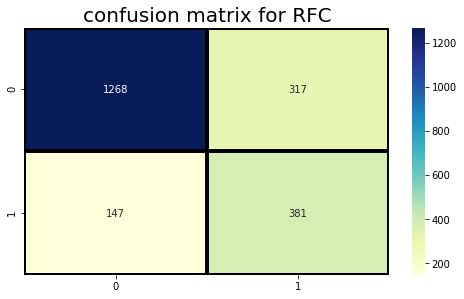

In [42]:
#混淆矩阵画图
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.heatmap(metrics.confusion_matrix(y_test, y_prediction),annot = True,fmt = "d",linecolor = "k",linewidths =3,cmap="YlGnBu")
plt.title("confusion matrix for RFC",fontsize=20)

/Users/songbeibei/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


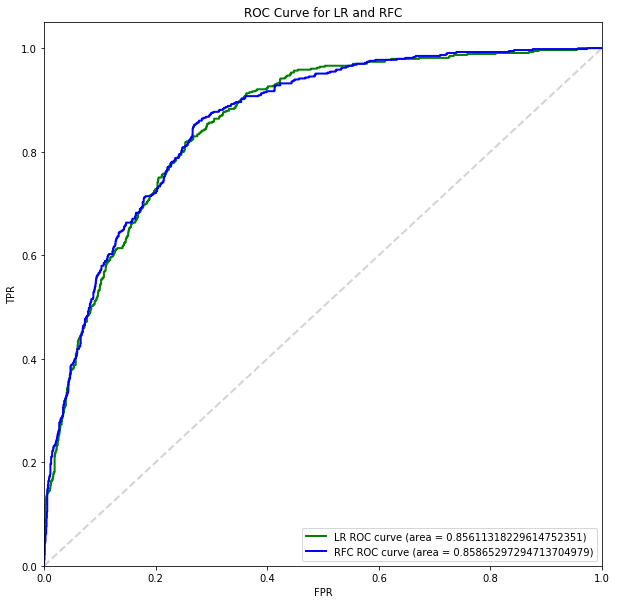

In [43]:
#画出逻辑回归和随机森林模型的ROC曲线
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='green',lw=lw,label='LR ROC curve (area = %0.20f)' % auc) 
plt.plot([0, 1], [0, 1], color='lightgrey', lw=lw, linestyle='--')
plt.plot(fpr2, tpr2, color='b',lw=lw,label='RFC ROC curve (area = %0.20f)' % auc2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for LR and RFC')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'importances of features')

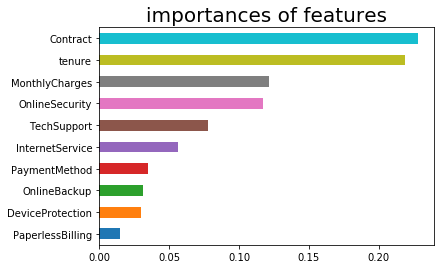

In [44]:
importances = rfc.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind='barh')
plt.title("importances of features",fontsize=20)

从上图可看出，在随机森林算法中，合同签订方式，入网时长和月付费金额对预测客户流失最重要。

# 4 用户流失特征总结与建议

### * 项目目标七结论如下：
   ### * 根据以上结论给出的相关的业务建议：    

1. 对年老客户，对于未婚客户和没有家属的客户，可以进行电话回访，并且针对用户喜好，制定不同的优惠套餐，实现客户关系个性化，从而降低流失率。且年老用客户的LTV值大于年轻客户，所以这部分人群是重点关注对象。
                
2. 对于不使用纸质账单和使用电子支票付费的客户，他们更喜欢合同签订方式为月付费，一旦每个月的合同过期，那么客户很容易就会流失，所以针对这部分客户，我们可以在签订合同或者即将下次续约的时候，推出并告知年付费优惠活动，从而吸引这部分用户从月付费转变成年付费用户。
                
3. 对于入网时间较短的新客户，除了推出优惠券和折扣等服务，也可以推出每日签到/打卡赢积分等活动，从而培养客户每日关注的习惯，提高对本公司的忠诚度。
                
4. 对于使用光纤的客户，因为其月均付费比DSL的高出较多，也就是说光纤的价格比DSL要高很多，那么光纤客户也就容易流失，所以建议适量降低光纤价格，从而降低光纤客户的流失率。
               
5. 对于没有订阅备份服务、设备保护服务和技术支持服务的客户，可以增加推送这些服务信息的次数，或者在合同签订之时，推送与其相关的捆绑优惠套餐，从而吸引更多的客户订阅这些服务。

6. 因为“合同签订方式，入网时长和月付费金额”这三个特征对客户流失率影响最大，所以上述建议的优先级也是这三者最高。

7. 针对以上用户特征和数据模型，可以结合具体业务中的用户行为特征和生命周期特征，建立用户流失集，然后针对尚未明确是否流失的用户进行预测，建立用户流失评分体系，根据不同的用户评分和打标，从而区分低、中、高风险流失用户。